# 加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("D:/workspace/spark-tools/src/main/data/fraudCreditCard/creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 数据预处理

## 时间数据特征处理

In [5]:
# 时间数据特征处理，将时间转换成24小时
df["hour"] = df["Time"].apply(lambda x:np.ceil(float(x)/3600)%24)

In [6]:
# 分析每个时间段，好坏样本的占比
# 透视表，做聚合操作
df.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


# 数据处理，特征筛选

## 直方图分布，分析特征变量相关性

In [1]:
v_features = df.ix[:,1:29].columns
print(v_features)

NameError: name 'df' is not defined

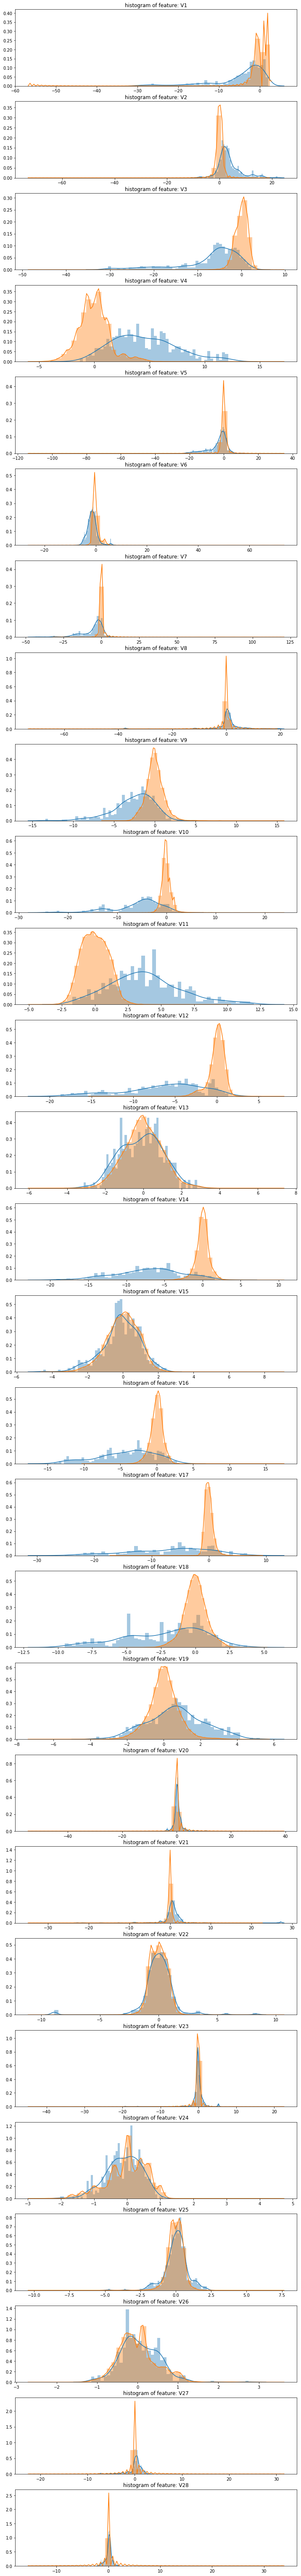

In [8]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [10]:
# Drop all of the features that have very similar distributions between the two types of transactions.
# df = df.drop([['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']], axis =1)
# df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11','V12','V14', 'V16', 'V17', 'V18', 'V19', 'V21','Class']]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


## 变量相关性分析

In [11]:
corrmat = df.corr()
# saleprice correlation matrix
corrmat = df.corr()
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Class')['Class'].index
print(cols)
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

Index(['Class', 'V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28',
       'Amount', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24', 'Time',
       'hour', 'V6', 'V5', 'V9', 'V1', 'V18'],
      dtype='object')


## 使用决策树模型，筛选变量

In [12]:
from sklearn.ensemble import RandomForestRegressor
# 按照特征重要性, 进行降序排列, 最重要的特征在最前面
etr = RandomForestRegressor(n_estimators=10)
train_y = df["Class"]
train_x = df.drop(['Class'], axis=1)
etr.fit(train_x, train_y)
imp = pd.DataFrame({'feature': train_x.columns, 'score': etr.feature_importances_})

In [14]:
print(imp.sort_values(by='score',ascending=False))

   feature     score
17     V17  0.495037
14     V14  0.102024
12     V12  0.074308
10     V10  0.064408
26     V26  0.028381
4       V4  0.021338
27     V27  0.019156
16     V16  0.015818
15     V15  0.015700
1       V1  0.015307
21     V21  0.013952
0     Time  0.013717
19     V19  0.011878
29  Amount  0.010003
24     V24  0.009975
7       V7  0.009954
22     V22  0.008816
13     V13  0.008463
6       V6  0.006556
3       V3  0.006020
11     V11  0.005956
28     V28  0.005775
9       V9  0.005637
23     V23  0.005411
8       V8  0.004846
5       V5  0.004555
20     V20  0.004426
18     V18  0.004086
30    hour  0.003089
2       V2  0.002738
25     V25  0.002670
